In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

In [32]:
data = pd.read_csv('../data/raw/trends_in_pregnancy_related_mortality_in_the_united_states__1987_2017.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,1/1/1987,1/1/1988,1/1/1989,1/1/1990,1/1/1991,1/1/1992,1/1/1993,1/1/1994,1/1/1995,1/1/1996,...,1/1/2008,1/1/2009,1/1/2010,1/1/2011,1/1/2012,1/1/2013,1/1/2014,1/1/2015,1/1/2016,1/1/2017
0,7.2,9.4,9.8,10.0,10.3,10.8,11.1,12.9,11.3,11.3,...,15.5,17.8,16.7,17.8,15.9,17.3,18.0,17.2,16.9,17.3


In [205]:
mortality_rate = data.T
mortality_rate = mortality_rate.reset_index()
mortality_rate = mortality_rate.rename({0:'Rate'}, axis=1)
mortality_rate['year'] = mortality_rate['index']

years =  [i for i in range(1987, 2018)]
mortality_rate['year'] = years
#mortality_rate["YoY"] = [i for i in range(mortality_rate["Rate"], (i+1) - i)/i)
# ? index into a dataframe column use loc or iloc inside the for loop

mortality_rate = mortality_rate.drop('index', axis=1)        

# mortality_rate.iloc[0,0]
# mortality_rate["YoY"] = [((i+1) - i)/i) for i in range(mortality_rate[0,i], (i+1) - i)/i)
  
    
#create a column to calculate YoY rate of change:
lst = []                     
for i in range(0, len(mortality_rate['Rate']) -1 ):
      lst.append( ( ( mortality_rate.iloc[i+1,0] - mortality_rate.iloc[i,0]  ) / mortality_rate.iloc[i,0] ) )
        
lst.append(0)
mortality_rate["YoY"] = lst
mortality_rate

,Rate,year,YoY
0,7.2,1987,0.305556
1,9.4,1988,0.042553
2,9.8,1989,0.020408
3,10.0,1990,0.030000
4,10.3,1991,0.048544
5,10.8,1992,0.027778
6,11.1,1993,0.162162
7,12.9,1994,-0.124031
8,11.3,1995,0.000000
9,11.3,1996,0.141593


In [231]:
print(mortality_rate["YoY"].describe())
YoY_mean = mortality_rate["YoY"].mean()
print('\n mean YoY change: ', round(YoY_mean,3))

count    31.000000
mean      0.032700
std       0.094041
min      -0.124031
25%      -0.029129
50%       0.023669
75%       0.078508
max       0.305556
Name: YoY, dtype: float64

 mean YoY change:  0.033


In [224]:
print(mortality_rate.loc[29],'\n')
print(mortality_rate.loc[0])

total_delta = mortality_rate.loc[29] - mortality_rate.loc[0]
print('\n',total_delta)

9.7/29

Rate      16.900000
year    2016.000000
YoY        0.023669
Name: 29, dtype: float64 

Rate       7.200000
year    1987.000000
YoY        0.305556
Name: 0, dtype: float64

 Rate     9.700000
year    29.000000
YoY     -0.281887
dtype: float64


0.33448275862068966

<AxesSubplot:xlabel='year'>

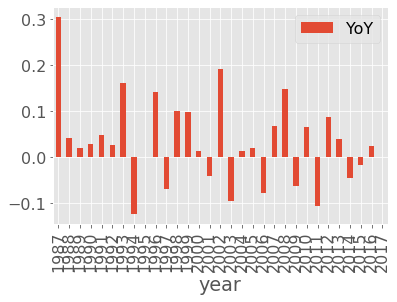

In [207]:
mortality_rate.plot('year','YoY', kind='bar' )

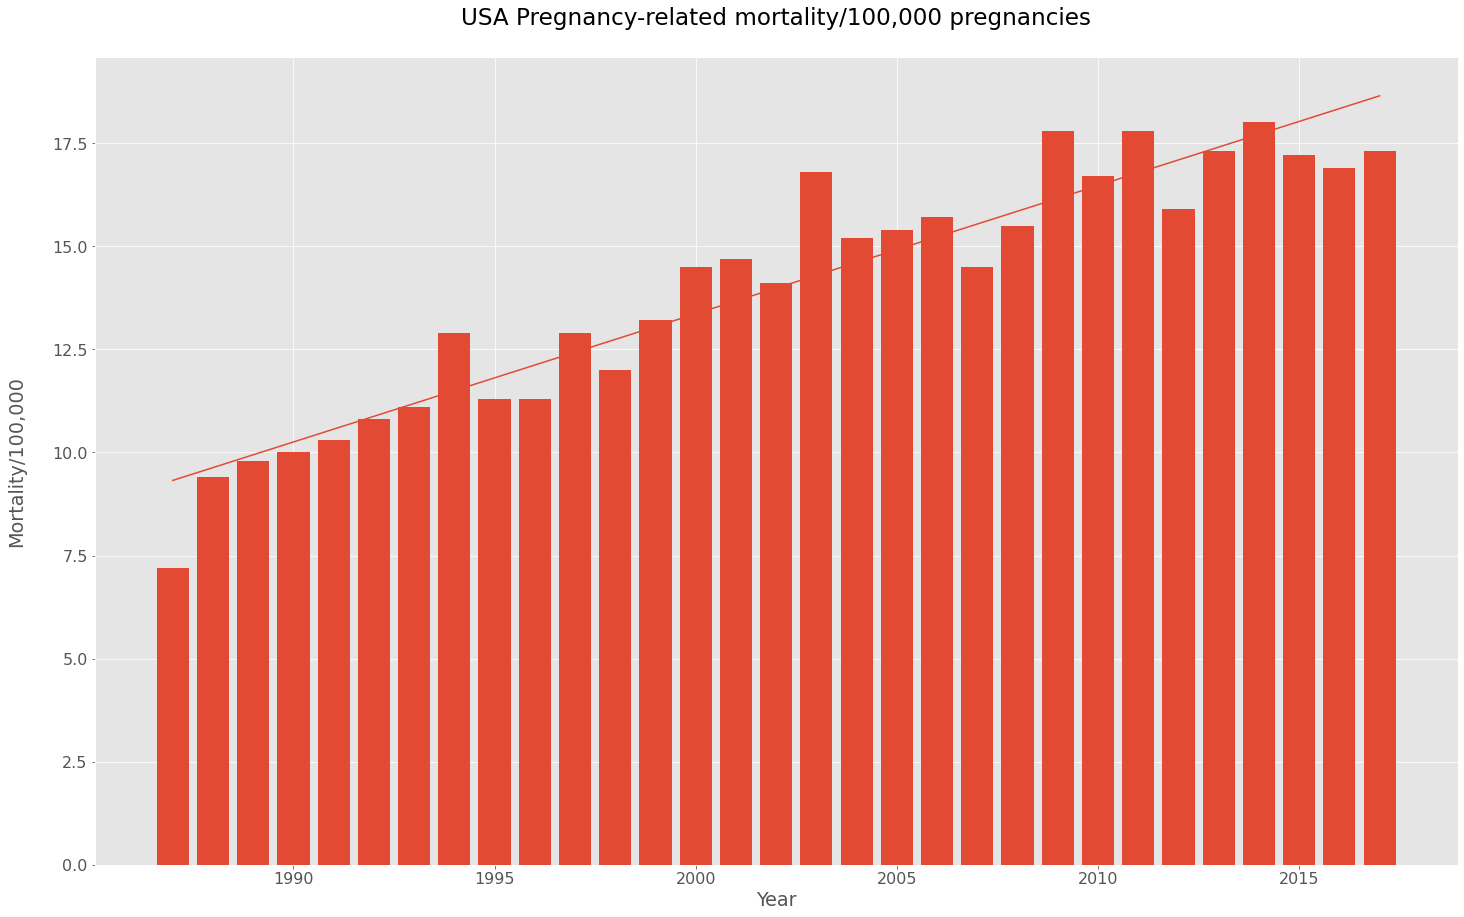

In [117]:
fig, ax = plt.subplots(figsize=(20,12), dpi=fig.dpi)
ax.bar(mortality_rate['year'], mortality_rate['Rate'])
fig.tight_layout()
ax.set_title('USA Pregnancy-related mortality/100,000 pregnancies\n')
ax.set_xlabel('Year')
ax.set_ylabel('Mortality/100,000\n')
m, b = np.polyfit(mortality_rate['year'], mortality_rate['Rate'],1)
x= mortality_rate['year']
line_of_best_fit = m*x+b
plt.plot(x, m*x + b)
#plt.show()
plt.savefig('../data/processed/USA_preg_mortality_rate.png')
#plt.savefig('/processed/USA_preg_mortality_rate.png')

In [ ]:
Mortality Rate increase

In [158]:
df=pd.read_csv('../data/raw/causes_of_pregnancy_related_death_in_the_united_states__2014_2017 (1).csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.T
df = df.reset_index()
df['Causes of Death'] = df['index']
df = df.drop('index',axis=1)
df = df.rename({0:'Count'},axis=1)
df

,Count,Causes of Death
0,15.5,Other cardiovascular conditions
1,12.7,Infection or sepsis
2,11.5,Cardiomyopathy
3,10.7,Hemorrhage
4,9.6,Thrombotic pulmonary or other embolism
5,8.2,Cerebrovascular accidents
6,6.6,Hypertensive disorders of pregnancy
7,5.5,Amniotic fluid embolism
8,0.4,Anesthesia complications
9,12.5,Other noncardiovascular medical conditions


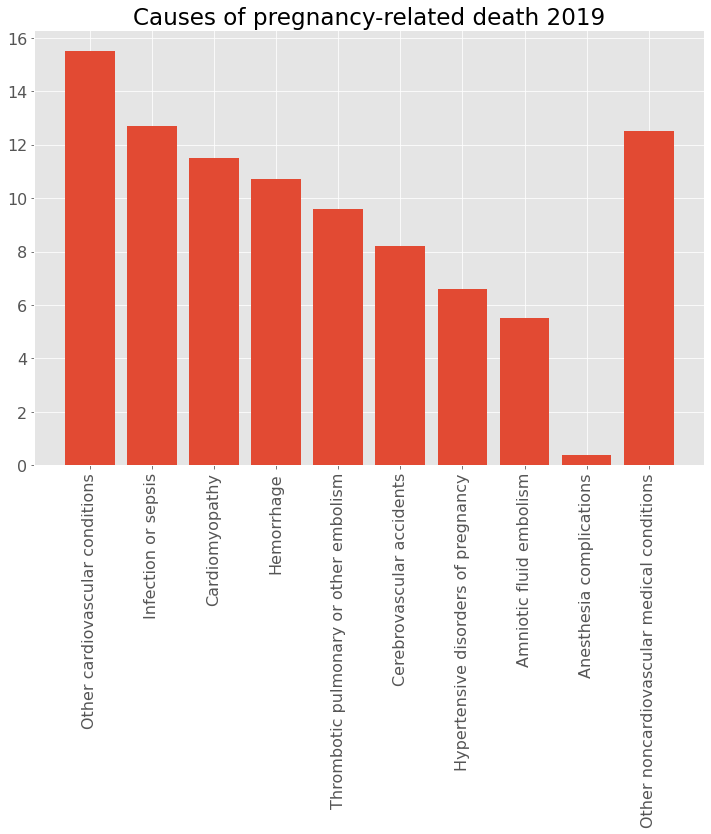

In [172]:
fix, ax = plt.subplots(figsize=(12,8))
x = df['Causes of Death']
y = df['Count']
ax.bar(x,y)
ax.set_title('Causes of pregnancy-related death 2019')

plt.xticks(rotation = 90)
plt.show()

In [236]:
oecd = pd.read_csv('../data/processed/OECD_Maternal_Mortality_rate.csv')
oecd

,Country,2018
0,Estonia,0.0
1,Iceland,0.0
2,Ireland,0.0
3,Poland,1.3
4,Denmark,1.6
5,New Zealand,1.7
6,Norway,1.8
7,Spain,1.9
8,Netherlands,3.0
9,Germany,3.2


In [238]:
oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   2018     36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [252]:
oecd.describe()


,2018
count,36.000000
mean,7.905556
std,8.025422
min,0.000000
25%,3.150000
50%,4.700000
75%,11.300000
max,34.600000


In [260]:
q1 = oecd.quantile(.25)
q3 = oecd.quantile(.75)
oecd = oecd.sort_values('2018', ascending=False)
oecd

,Country,2018
35,Mexico,34.6
34,Luxembourg,32.4
33,United States,17.4
32,Portugal,17.2
31,Latvia,15.7
30,Lithuania,14.2
29,Turkey,13.6
28,Chile,13.1
26,Korea,11.3
27,Greece,11.3


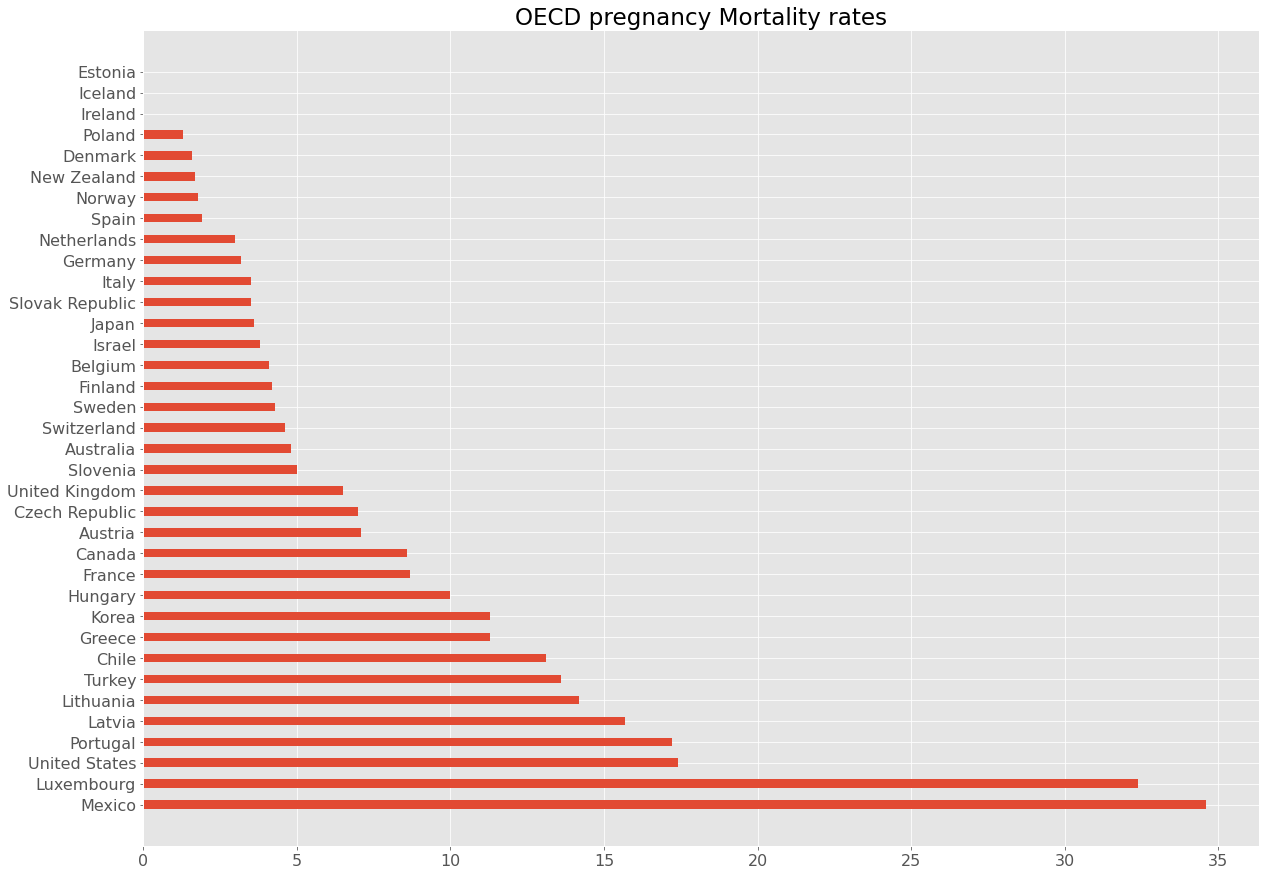

In [257]:
oecd = oecd.sort_values('2018', ascending=False)

fig, ax =plt.subplots(figsize=(20,15))
x = oecd['2018']
y = oecd['Country']
labels = x.values

ax.set_title("OECD pregnancy Mortality rates")




ax.barh(y, width=x, height=0.4)
plt.plot

plt.savefig('../data/processed/OECD_Pregnancy_Mortality_Rates.png')